In [70]:
import scipy as sp
import numpy as np
from scipy.io import loadmat
from scipy import linalg as LA
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import patches as pt
import matplotlib.cm as cm
import matplotlib.animation as anm
%matplotlib inline

In [2]:
path=r'../../DATA/Nathun&Brunton/DATA/FLUIDS/'
DATA=loadmat(path+'CYLINDER_ALL.mat')

In [78]:
vort = DATA['VORTALL']
Ny=DATA['nx'][0][0]
Nx=DATA['ny'][0][0]
M=DATA['m'][0][0]
N=DATA['n'][0][0]
print(Nx,Ny)
vort_last=vort[:,-1].reshape(Nx,Ny).T
vort_ave=np.average(vort,axis=1).reshape(Nx,Ny).T

dt=0.02*10

449 199


In [4]:
_x=np.linspace(-1,8,Nx)
_y=np.linspace(-2,2,Ny)
x,y=np.meshgrid(_x,_y)

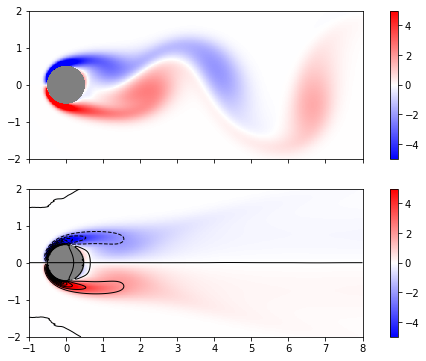

In [65]:
fig,[ax0,ax1]=plt.subplots(2,1,figsize=(10,6),sharex='col')
ims=[]
im1=ax1.pcolormesh(x,y,vort_ave,cmap=cm.bwr,vmin=-5,vmax=5)
ax1.contour(x,y,vort_ave,20,colors='black',linewidths=1)
ax1.set_aspect('equal',adjustable='box')
circ=pt.Circle((0,0),radius=.5,fill=True, facecolor='gray')
ax1.add_patch(circ)
fig.colorbar(im1,ax=ax1)

for i in range(0,len(vort[0,:]),1):
    #cnt=ax0.contour(x,y,vort[:,i].reshape(Nx,Ny).T,20,colors='black',linewidths=1)
    im0=ax0.pcolormesh(x,y,vort[:,i].reshape(Nx,Ny).T,cmap=cm.bwr,vmin=-5,vmax=5)
    ax0.set_aspect('equal',adjustable='box')
    circ=pt.Circle((0,0),radius=.5,fill=True, facecolor='gray')
    ax0.add_patch(circ)
    if i==0:
        fig.colorbar(im0,ax=ax0)

        
    ims.append([im0])


In [69]:
res=anm.ArtistAnimation(fig, ims, interval=25)
from IPython.display import HTML
HTML(res.to_html5_video(embed_limit=100.))

In [77]:
def DMD(DATA, rank=10,exact=False):
    X=DATA[:,:-1]
    Y=DATA[:,1:]
    
    U,S,Vh=LA.svd(X,full_matrices=False)
    Ur=U[:,:rank]
    iSr=sp.diag(1./S[:rank])
    Vr=Vh.conj().T[:,:rank]
    
    At=Ur.conj().T@Y@Vr@iSr
    L, W=LA.eig(At)
    if exact:
        Phi=Y@Vr@iSr@W
    else:
        Phi=Ur@W
    return L, Phi

L, Phi = DMD(vort,rank=30)
exL, exPhi = DMD(vort,rank=30,exact=True)
    

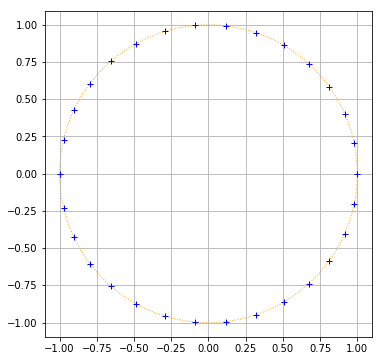

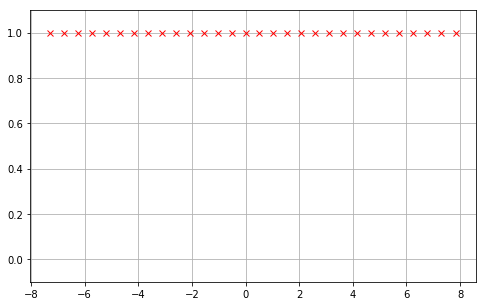

In [93]:
omg=.5*sp.log(L)/dt

plt.figure(figsize=(6,6))
plt.plot(L.real,L.imag,'b+',ms=6)
circ=pt.Circle((0,0),radius=1, fill=False, linestyle=':',color='orange')
plt.gca().add_patch(circ)
plt.gca().set_aspect('equal')
plt.grid()

plt.figure(figsize=(8,5))
plt.plot(omg.imag, sp.exp(omg.real),'rx')
plt.ylim(-.1,1.1)
plt.grid()

In [95]:
fig=plt.figure(figsize=(10,4))


<Figure size 720x288 with 0 Axes>